# Assignment activity 1: Make predictions with regression 

## Data cleaning and import

In [1]:
# Import the relevant libraries and packages for subsequent analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import math
import time
from statsmodels.formula.api import ols

In [2]:
# Load the turtle_reviews and turtle_sales data as DataFrames
reviews_df = pd.read_csv("turtle_reviews.csv")
sales_df = pd.read_csv("turtle_sales.csv")

In [3]:
# Sense check the reviews and sales DataFrame
reviews_df

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [4]:
sales_df

Ranking  Product Platform    Year         Genre               Publisher  \
0          1      107      Wii  2006.0        Sports                Nintendo   
1          2      123      NES  1985.0      Platform                Nintendo   
2          3      195      Wii  2008.0        Racing                Nintendo   
3          4      231      Wii  2009.0        Sports                Nintendo   
4          5      249       GB  1996.0  Role-Playing                Nintendo   
..       ...      ...      ...     ...           ...                     ...   
347    13227     3436       PC  2003.0        Racing         Electronic Arts   
348    13734      629       PC  2003.0        Action    Take-Two Interactive   
349    13886     4399       PC  2003.0       Shooter  Microsoft Game Studios   
350    15784     4702       PC  2007.0       Shooter  Microsoft Game Studios   
351    16096     1012       PC  2002.0        Action    Take-Two Interactive   

     NA_Sales  EU_Sales  Global_Sales  
0       34.02     23.80         67.85  
1       23.85      2.94         33.00  
2       13.00     10.56         29.37  
3       12.92      9.03         27.06  
4        9.24      7.29         25.72  
..        ...       ...           ...  
347      0.00      0.03          0.04  
348      0.00      0.02          0.03  
349      0.01      0.02          0.03  
350      0.00      0.01          0.02  
351      0.00      0.01          0.01  

[352 rows x 9 columns]

In [5]:
# Check the data types of both DataFrames
reviews_df.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [6]:
sales_df.dtypes

Ranking           int64
Product           int64
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
Global_Sales    float64
dtype: object

In [7]:
# Check for missing values in both datasets
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       352 non-null    int64  
 1   Product       352 non-null    int64  
 2   Platform      352 non-null    object 
 3   Year          350 non-null    float64
 4   Genre         352 non-null    object 
 5   Publisher     352 non-null    object 
 6   NA_Sales      352 non-null    float64
 7   EU_Sales      352 non-null    float64
 8   Global_Sales  352 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 24.9+ KB


In [9]:
# Validate 2 missing entries in sales data using isnull().sum()
sales_df.isnull().sum()

Ranking         0
Product         0
Platform        0
Year            2
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
Global_Sales    0
dtype: int64

In [10]:
# Create a summary of descriptive statistics
reviews_df.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [11]:
sales_df.describe()

Ranking      Product         Year    NA_Sales    EU_Sales  \
count    352.000000   352.000000   350.000000  352.000000  352.000000   
mean    1428.017045  3607.227273  2006.985714    2.515966    1.643778   
std     2743.580936  2360.239834     6.750343    3.409479    2.025752   
min        1.000000   107.000000  1982.000000    0.000000    0.000000   
25%       88.750000  1945.000000  2003.000000    0.477500    0.390000   
50%      176.500000  3340.000000  2009.000000    1.820000    1.170000   
75%     1439.750000  5435.750000  2012.000000    3.125000    2.160000   
max    16096.000000  9080.000000  2016.000000   34.020000   23.800000   

       Global_Sales  
count    352.000000  
mean       5.334688  
std        6.264962  
min        0.010000  
25%        1.115000  
50%        4.320000  
75%        6.435000  
max       67.850000

In [12]:
# remove null values in sales data
sales_df_clean= sales_df.dropna()

# Validate the missing rows have been removed
sales_df_clean.shape

(350, 9)

Removing null values reference: https://cmdlinetips.com/2018/03/how-to-filter-a-pandas-dataframe-based-on-null-values-of-a-column/

In [13]:
# drop duplicate rows
reviews_df_clean = reviews_df.duplicated(keep="first")

# print the dataframe without duplicates
reviews_df3 = reviews_df[~reviews_df_clean]

In [14]:
# drop duplicate rows
sales_df_clean2 = sales_df_clean.duplicated(keep="first")

# print the dataframe without duplicates
sales_df_clean3 = sales_df_clean[~sales_df_clean2]

Removing duplicates - reference: # https://www.machinelearningplus.com/pandas/pandas-duplicated/#:~:text=duplicated()%20method%20is%20used,row%20is%20duplicate%20or%20unique.

In [15]:
# remove redundant columns in the reviews DataFrame
reviews_df4 = reviews_df3.drop(columns=["language","platform"],axis=0)
reviews_df4

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [16]:
# remove redundant columns in the sales DataFrame
sales_df_clean4 = sales_df_clean3.drop(columns=["Platform"],axis=0)
sales_df_clean4

Ranking  Product    Year         Genre               Publisher  NA_Sales  \
0          1      107  2006.0        Sports                Nintendo     34.02   
1          2      123  1985.0      Platform                Nintendo     23.85   
2          3      195  2008.0        Racing                Nintendo     13.00   
3          4      231  2009.0        Sports                Nintendo     12.92   
4          5      249  1996.0  Role-Playing                Nintendo      9.24   
..       ...      ...     ...           ...                     ...       ...   
347    13227     3436  2003.0        Racing         Electronic Arts      0.00   
348    13734      629  2003.0        Action    Take-Two Interactive      0.00   
349    13886     4399  2003.0       Shooter  Microsoft Game Studios      0.01   
350    15784     4702  2007.0       Shooter  Microsoft Game Studios      0.00   
351    16096     1012  2002.0        Action    Take-Two Interactive      0.00   

     EU_Sales  Global_Sales  
0       23.80         67.85  
1        2.94         33.00  
2       10.56         29.37  
3        9.03         27.06  
4        7.29         25.72  
..        ...           ...  
347      0.03          0.04  
348      0.02          0.03  
349      0.02          0.03  
350      0.01          0.02  
351      0.01          0.01  

[350 rows x 8 columns]

In [17]:
# Rename "renumeration" to "salary" 
reviews_df4.rename(columns = {"remuneration (k£)":"salary(thousands)",
                              "spending_score (1-100)":"expenditure_rank"},
                   inplace=True)

# Check the DataFrame to see if the columns have been renamed
reviews_df4

gender  age  salary(thousands)  expenditure_rank  loyalty_points  \
0       Male   18              12.30                39             210   
1       Male   23              12.30                81             524   
2     Female   22              13.12                 6              40   
3     Female   25              13.12                77             562   
4     Female   33              13.94                40             366   
...      ...  ...                ...               ...             ...   
1995  Female   37              84.46                69            4031   
1996  Female   43              92.66                 8             539   
1997    Male   34              92.66                91            5614   
1998    Male   34              98.40                16            1048   
1999    Male   32              92.66                 8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

Renaming columns reference: https://www.statology.org/pandas-rename-columns/

In [18]:
# Save a copy of the cleaned DataFrames as csv
reviews_df4.to_csv("turtle_reviews_cleaned")
sales_df_clean4.to_csv("sales_turtle_cleaned")

In [19]:
# Reimport the cleaned csvs to sense-check
reviews_final = pd.read_csv("turtle_reviews_cleaned")
reviews_final

Unnamed: 0  gender  age  salary(thousands)  expenditure_rank  \
0              0    Male   18              12.30                39   
1              1    Male   23              12.30                81   
2              2  Female   22              13.12                 6   
3              3  Female   25              13.12                77   
4              4  Female   33              13.94                40   
...          ...     ...  ...                ...               ...   
1995        1995  Female   37              84.46                69   
1996        1996  Female   43              92.66                 8   
1997        1997    Male   34              92.66                91   
1998        1998    Male   34              98.40                16   
1999        1999    Male   32              92.66                 8   

      loyalty_points education  product  \
0                210  graduate      453   
1                524  graduate      466   
2                 40  graduate      254   
3                562  graduate      263   
4                366  graduate      291   
...              ...       ...      ...   
1995            4031       PhD      977   
1996             539       PhD      979   
1997            5614  graduate     1012   
1998            1048       PhD     1031   
1999             479       PhD      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [20]:
sales_final = pd.read_csv("sales_turtle_cleaned")
sales_final

Unnamed: 0  Ranking  Product    Year         Genre  \
0             0        1      107  2006.0        Sports   
1             1        2      123  1985.0      Platform   
2             2        3      195  2008.0        Racing   
3             3        4      231  2009.0        Sports   
4             4        5      249  1996.0  Role-Playing   
..          ...      ...      ...     ...           ...   
345         347    13227     3436  2003.0        Racing   
346         348    13734      629  2003.0        Action   
347         349    13886     4399  2003.0       Shooter   
348         350    15784     4702  2007.0       Shooter   
349         351    16096     1012  2002.0        Action   

                  Publisher  NA_Sales  EU_Sales  Global_Sales  
0                  Nintendo     34.02     23.80         67.85  
1                  Nintendo     23.85      2.94         33.00  
2                  Nintendo     13.00     10.56         29.37  
3                  Nintendo     12.92      9.03         27.06  
4                  Nintendo      9.24      7.29         25.72  
..                      ...       ...       ...           ...  
345         Electronic Arts      0.00      0.03          0.04  
346    Take-Two Interactive      0.00      0.02          0.03  
347  Microsoft Game Studios      0.01      0.02          0.03  
348  Microsoft Game Studios      0.00      0.01          0.02  
349    Take-Two Interactive      0.00      0.01          0.01  

[350 rows x 9 columns]

In [21]:
# Sense-check the finalised reviews data
reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   gender             2000 non-null   object 
 2   age                2000 non-null   int64  
 3   salary(thousands)  2000 non-null   float64
 4   expenditure_rank   2000 non-null   int64  
 5   loyalty_points     2000 non-null   int64  
 6   education          2000 non-null   object 
 7   product            2000 non-null   int64  
 8   review             2000 non-null   object 
 9   summary            2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [22]:
sales_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    350 non-null    int64  
 1   Ranking       350 non-null    int64  
 2   Product       350 non-null    int64  
 3   Year          350 non-null    float64
 4   Genre         350 non-null    object 
 5   Publisher     350 non-null    object 
 6   NA_Sales      350 non-null    float64
 7   EU_Sales      350 non-null    float64
 8   Global_Sales  350 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 24.7+ KB


## Plotting the simple linear regression for loyalty vs age

<AxesSubplot:xlabel='age', ylabel='loyalty_points'>

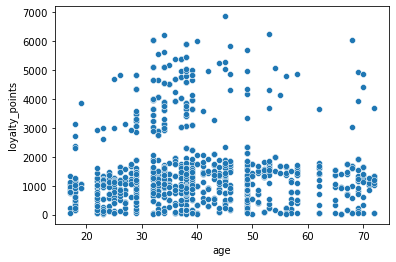

In [23]:
# Utilise linear regression to find the relationship between loyalty points and age
# to determine if it can be used to predict loyalty points

# Specify independent and dependent variables
# Set loyalty_points as the dependent variable
y = reviews_final["loyalty_points"]

# Set age as the independent variable
x = reviews_final["age"]

# Plot the scatterplot to visualise linearity between variables
sns.scatterplot(y="loyalty_points",x="age",data=reviews_final)

In [29]:
# Fit the dependent and independent variables using the OLS method
f = "y~x"
ols_model_age = ols(f,data=reviews_final).fit()

# Generate the regression table based on the X coefficient and constant values
ols_model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 05 Aug 2022   Prob (F-statistic):             0.0577
Time:                        16:37:38   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Extract the parameters, standard errors and predicted values
print("The parameters is:",ols_model_age.params)
print("The Base Standard Error is:",ols_model_age.bse)
print("The predictions are:",ols_model_age.predict())

The parameters is: Intercept    1736.517739
x              -4.012805
dtype: float64
The Base Standard Error is: Intercept    88.248731
x             2.113177
dtype: float64
The predictions are: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [34]:
# Define the regression line 
y_pred_age = -4.012805*reviews_final["age"] + 1736.517739

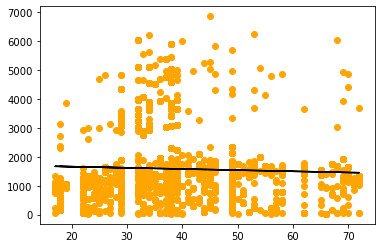

In [53]:
# Plot the linear regression to show the relationship between age and loyalty_points
plt.scatter(x=x,y=y,color="orange")
plt.plot(reviews_final["age"],y_pred_age,color="black")

### Observations and Conclusion
Age does not look like a strong predictor for loyalty points. There is a weak negative relationship between age and loyalty points. A weak R-squared value of 0.002 also shows that age has no influence over loyalty points.

# Plotting the simple linear regression between loyalty_points vs salary

<AxesSubplot:xlabel='salary(thousands)', ylabel='loyalty_points'>

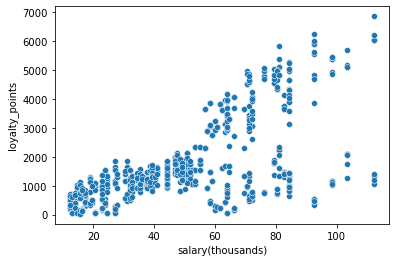

In [41]:
# Utilise linear regression to find the relationship between loyalty points and age/salary/expenditure scores
# to determine if these can be used to predict loyalty points

# Specify independent and dependent variables

# Set loyalty_points as the dependent variable
y = reviews_final["loyalty_points"]

# Set age as the independent variable
x_2 = reviews_final["salary(thousands)"]

# Plot the scatterplot to visualise linearity between variables
sns.scatterplot(y="loyalty_points",x="salary(thousands)",data=reviews_final)

In [42]:
# Fit the dependent and independent variables using the OLS method
f2 = "y~x_2"
ols_model_salary = ols(f2,data=reviews_final).fit()

# Generate the regression table based on the X coefficient and constant values
ols_model_salary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        16:48:34   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_2           34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Extract the parameters, standard errors and predicted values
print("The parameters is:",ols_model_salary.params)
print("The Base Standard Error is:",ols_model_salary.bse)
print("The predictions are:",ols_model_salary.predict())

The parameters is: Intercept   -65.686513
x_2          34.187825
dtype: float64
The Base Standard Error is: Intercept    52.170717
x_2           0.977925
dtype: float64
The predictions are: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


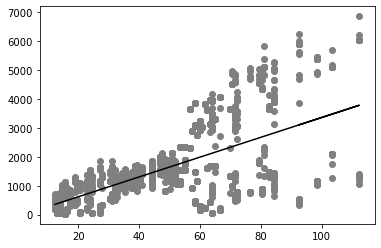

In [57]:
# Define the regression line 
y_pred_salary = 34.187825*reviews_final["salary(thousands)"] - 65.686513

# Plot the linear regression to show the relationship between age and loyalty_points
plt.scatter(x=x_2,y=y,color="gray")
plt.plot(reviews_final["salary(thousands)"],y_pred_salary,color="black")

### Observations and Conclusions
Salary is a weak to moderate predictor of loyalty points. A positive trend line indicates that for every increase in salary, loyalty points will increase as well. The R-squared of value of 0.380 is better than age, but it is less than 0.70. Hence we can say that salary is a weak predictor of loyalty points.

# Plotting the simple linear regression between loyalty_points vs expenditure_rank

<AxesSubplot:xlabel='expenditure_rank', ylabel='loyalty_points'>

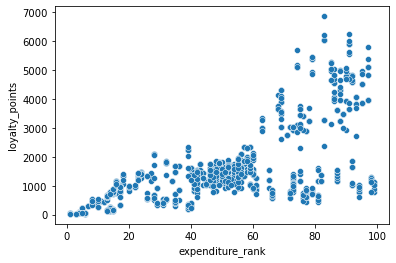

In [45]:
# Utilise linear regression to find the relationship between loyalty points and age/salary/expenditure scores
# to determine if these can be used to predict loyalty points

# Specify independent and dependent variables

# Set loyalty_points as the dependent variable
y = reviews_final["loyalty_points"]

# Set age as the independent variable
x_3 = reviews_final["expenditure_rank"]

# Plot the scatterplot to visualise linearity between variables
sns.scatterplot(y="loyalty_points",x="expenditure_rank",data=reviews_final)

In [47]:
# Fit the dependent and independent variables using the OLS method
f3 = "y~x_3"
ols_model_salary = ols(f3,data=reviews_final).fit()

# Generate the regression table based on the X coefficient and constant values
ols_model_salary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        16:53:06   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x_3           33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Extract the parameters, standard errors and predicted values
print("The parameters is:",ols_model_salary.params)
print("The Base Standard Error is:",ols_model_salary.bse)
print("The predictions are:",ols_model_salary.predict())

The parameters is: Intercept   -75.052663
x_3          33.061693
dtype: float64
The Base Standard Error is: Intercept    45.930554
x_3           0.814419
dtype: float64
The predictions are: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


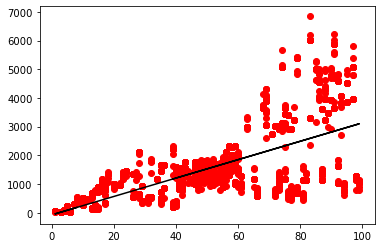

In [50]:
# Define the regression line 
y_pred_exp_rank = 32.061693*reviews_final["expenditure_rank"] - 75.052663

# Plot the linear regression to show the relationship between age and loyalty_points
plt.scatter(x=x_3,y=y,color="red")
plt.plot(reviews_final["expenditure_rank"],y_pred_exp_rank,color="black")

### Observations and Conclusions
Similar to salary, expenditure is a weak to moderate predictor of loyalty points. A positive trend line indicates that for every increase in expenditure, loyalty points will increase as well. The R-squared of value of 0.452 is better than salary, but it is less than 0.70. Hence we can say that expenditure is a weak predictor of loyalty points.

However, it may be possible to improve the model's R-squared value by using both salary and expenditure in a multiple regression model.

# Areas of further exploration

- All three linear regression models have low R-squared values. It may be favourable to explore the same model with other variables (eg platform, product ID etc). Encode string values with dummy variables.
- Variables with favourable statistics (eg High R-Squared Values) can be made into a model, which can be tested for accuracy. 
- Prepare several iterations of models using multiple linear regression to find the strongest predictors of loyalty_score.

# Limitations
- The dataset should be tested using the breuschpagan test for multicollinearity prior to model fitting.

# Assignment activity 2: Make predictions with clustering

In [67]:
# Import the relevant libraries and packages for k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Subset the reviews_cleaned dataframe to salary and expenditure columns only
salary_exp_subset = reviews_final[["salary(thousands)","expenditure_rank"]]

# View the subsetted DataFrame
salary_exp_subset

salary(thousands)  expenditure_rank
0                 12.30                39
1                 12.30                81
2                 13.12                 6
3                 13.12                77
4                 13.94                40
...                 ...               ...
1995              84.46                69
1996              92.66                 8
1997              92.66                91
1998              98.40                16
1999              92.66                 8

[2000 rows x 2 columns]

In [ ]:
# Check the subsetted dataframe information
salary_exp_subset.info()

In [ ]:
# Run descriptive statistics on the subsetted data
salary_exp_subset.describe()

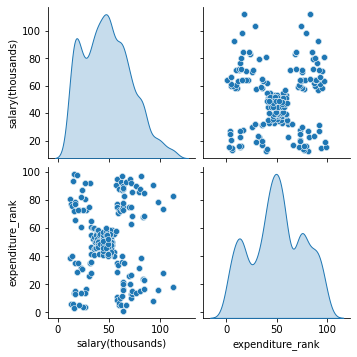

In [64]:
# Visualise the data using a pairplot to determine clusters
sns.pairplot(data=salary_exp_subset,diag_kind="kde")

## Applying the Elbow method

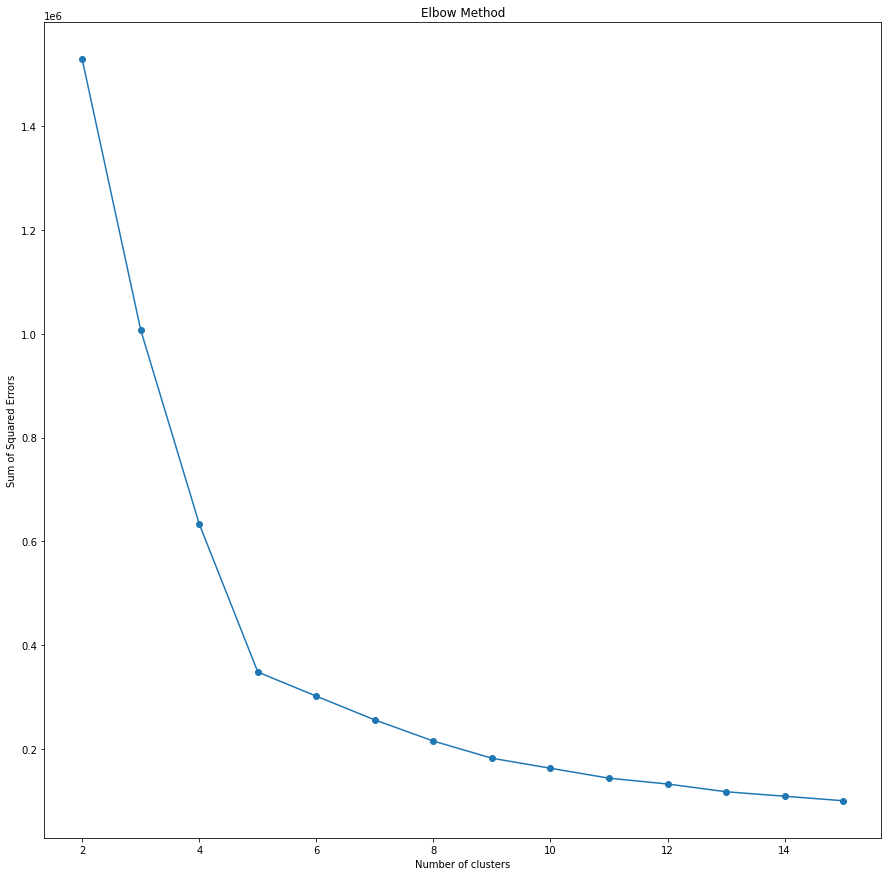

In [71]:
# Provide an empty list to store the results of the elbow method
elbow_result = []

# specify for a range between 2 and 16 
for k in range(2,16):

    # define kmeans using the KMeans function and set parameters
    kmeans = KMeans(n_clusters=k,init="k-means++",max_iter=300,n_init=10,random_state=0)
    # fit the KMeans method using the subset
    kmeans.fit(salary_exp_subset)
    # append results to empty list
    elbow_result.append(kmeans.inertia_)

# Define a plot to store the graph
fig, ax = plt.subplots(figsize=(15,15))

# Use plt.plot to graph the chart 
plt.plot(range(2,16),elbow_result,marker="o")

# Set plot titles and axis labels
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Errors")

# View the graph
plt.show()

## Applying the Silhouette Method

Text(0.5, 1.0, 'Silhouette Method - Results')

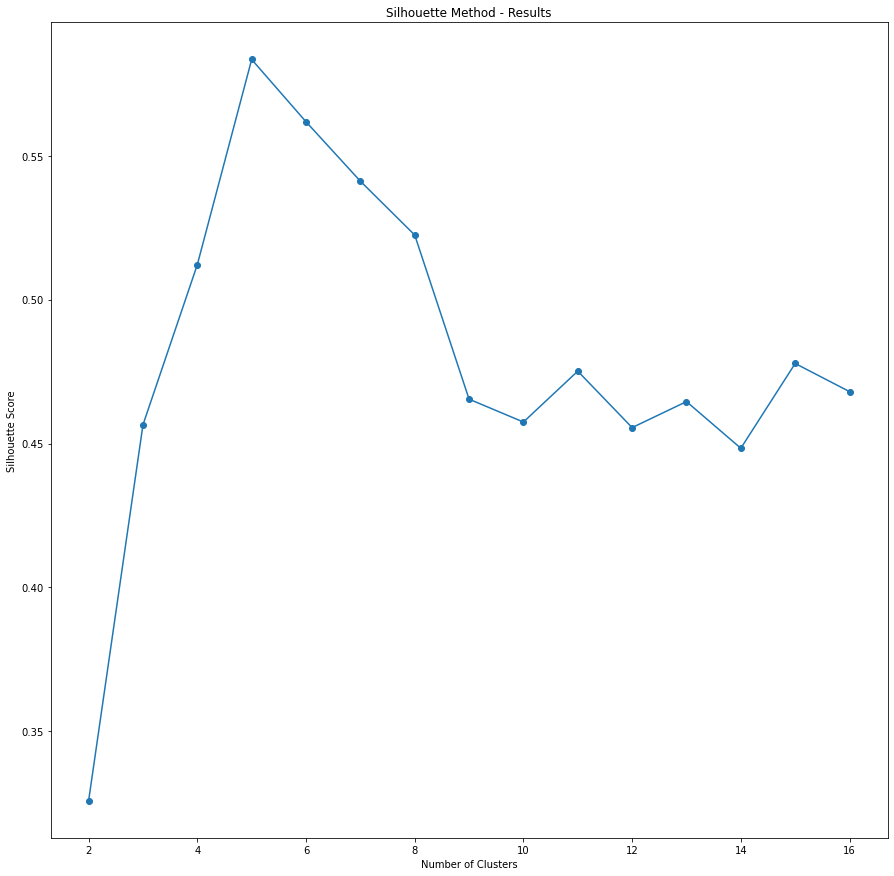

In [75]:
# Define an empty list to contain Silhouette score results
silhouette_result = []

# Define kmax as 16
kmax = 16

# Apply a for loop to define when the KMeans function should stop
for k in range(2,kmax+1):
    
    # Define the k_means_s object using the KMeans function
    k_means_s = KMeans(n_clusters=k).fit(salary_exp_subset)
    
    # Apply labels to the k_means_s object
    labels = k_means_s.labels_
    
    # Append the silhouette score results to the empty list
    silhouette_result.append(silhouette_score(salary_exp_subset,labels,metric="euclidean"))

# Plot the Silhouette Score Graph
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(range(2,kmax+1),silhouette_result,marker="o")

# Apply Title and legends on the chart 
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title("Silhouette Method - Results")

## Determining the number of clusters to use
- According to both graphs, the optimum number of clusters should be 5 clusters.
- The Elbow method shows a sharp decline in the Sum of Squared Errors from as the clusters increase from 2 to 5, but said decline slows down as the number of clusters increase.
- The Silhouette method shows a maximum peak at 5 clusters before dropping and plateauing.
- Both methods affirm that 5 clusters is ideal for the task at hand.

## Evaluate different values of k based on insights from Silhouette and Elbow Method

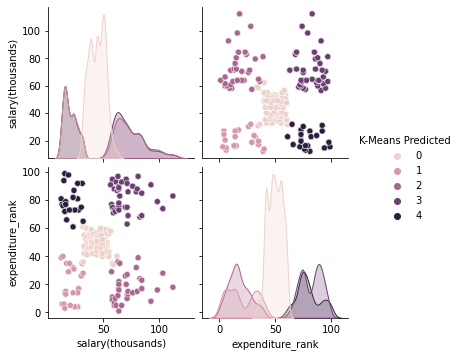

In [79]:
# Evaluate the usefulness of 5 clusters

# Set the kmeans variable using the right parameters and the subsetted DataFrame
kmeans = KMeans(n_clusters=5,max_iter=15000,init="k-means++",random_state=0).fit(salary_exp_subset)

# Set the clusters as kmeans labels
clusters = kmeans.labels_

# Define a new column, K-Means Predicted, in the Subsetted DataFrame 
# The new columns should contain cluster information
salary_exp_subset["K-Means Predicted"] = clusters

# Plot the predicted clusters with seaborn
sns.pairplot(salary_exp_subset,hue="K-Means Predicted",diag_kind="kde")

In [80]:
# Determine the number of observations per cluster
salary_exp_subset["K-Means Predicted"].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

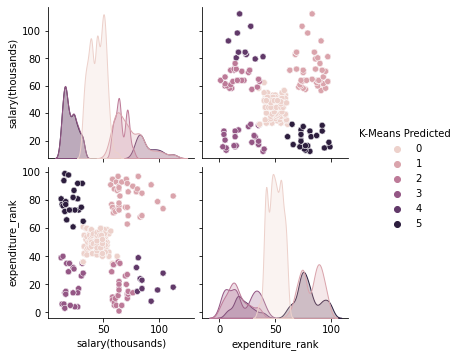

In [85]:
# Evaluate the usefulness of 6 clusters

# Set the kmeans variable using the right parameters and the subsetted DataFrame
kmeans = KMeans(n_clusters=6,max_iter=15000,init="k-means++",random_state=0).fit(salary_exp_subset)

# Set the clusters as kmeans labels
clusters = kmeans.labels_

# Define a new column, K-Means Predicted, in the Subsetted DataFrame 
# The new columns should contain cluster information
salary_exp_subset["K-Means Predicted"] = clusters

# Plot the predicted clusters with seaborn
sns.pairplot(salary_exp_subset,hue="K-Means Predicted",diag_kind="kde")

# Determine the number of observations per cluster
salary_exp_subset["K-Means Predicted"].value_counts()

2    767
3    271
4    271
6    269
1    214
5    123
0     85
Name: K-Means Predicted, dtype: int64

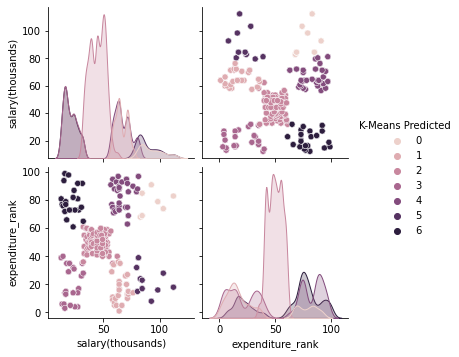

In [87]:
# Evaluate the usefulness of 7 clusters

# Set the kmeans variable using the right parameters and the subsetted DataFrame
kmeans = KMeans(n_clusters=7,max_iter=15000,init="k-means++",random_state=0).fit(salary_exp_subset)

# Set the clusters as kmeans labels
clusters = kmeans.labels_

# Define a new column, K-Means Predicted, in the Subsetted DataFrame 
# The new columns should contain cluster information
salary_exp_subset["K-Means Predicted"] = clusters

# Plot the predicted clusters with seaborn
sns.pairplot(salary_exp_subset,hue="K-Means Predicted",diag_kind="kde")

# Determine the number of observations per cluster
salary_exp_subset["K-Means Predicted"].value_counts()

## Justify the number of clusters using Yellowbrick, a machine learning visualsiation library that performs Comparative Analysis to Determine Best Value of K Using Silhouette Plot*

Yellowbrick reference: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=Silhouette%20score%20is%20used%20to,each%20sample%20of%20different%20clusters.

In [88]:
from sklearn import datasets
from sklearn.cluster import KMeans

# Instantiate the KMeans models
km = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model
km.fit_predict(salary_exp_subset)

# Calculate Silhoutte Score
score = silhouette_score(salary_exp_subset, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.584


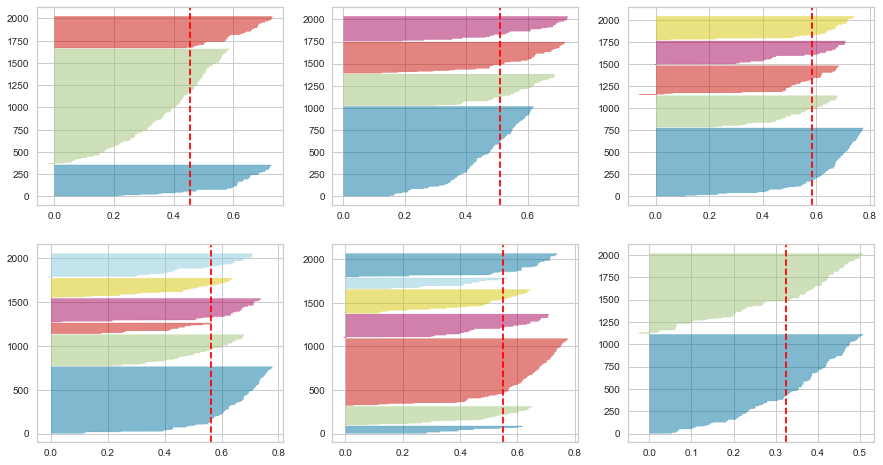

In [95]:
! pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', max_iter=15000, random_state=0)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(salary_exp_subset)

### Using the Method from the article, we can determine that 5 is the ideal number of clusters.

- n_clusters as 2,3 and 4 are suboptimal clusters as their silhouetter score (the red dotted lines) are below the silhouetter score fitted by the KMeans model. 
- n_clusters of 5,6,and 7 look optimal, as the silhouette score for each cluster is above the silhouetter score. However, the graphs for n_clusters 6 and 7 show large fluctuations in terms of graph size. Only the n_cluster=5 shows similar / more uniform fluctuations while having above average silhouetter score.Thus, 5 is the best number of clusters.

0    774
1    356
2    330
3    271
4    269
Name: K-Means Predicted, dtype: int64

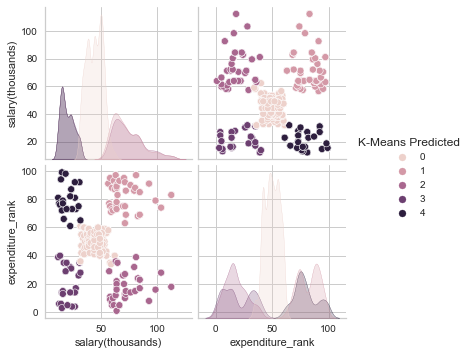

In [97]:
# Fitting the model with 5 clusters

# Set the kmeans variable using the right parameters and the subsetted DataFrame
kmeans = KMeans(n_clusters=5,max_iter=15000,init="k-means++",random_state=0).fit(salary_exp_subset)

# Set the clusters as kmeans labels
clusters = kmeans.labels_

# Define a new column, K-Means Predicted, in the Subsetted DataFrame 
# The new columns should contain cluster information
salary_exp_subset["K-Means Predicted"] = clusters

# Plot the predicted clusters with seaborn
sns.pairplot(salary_exp_subset,hue="K-Means Predicted",diag_kind="kde")

# Determine the number of observations per cluster
salary_exp_subset["K-Means Predicted"].value_counts()

[Text(0.5, 1.0, 'Salary vs Expenditure Clusters')]

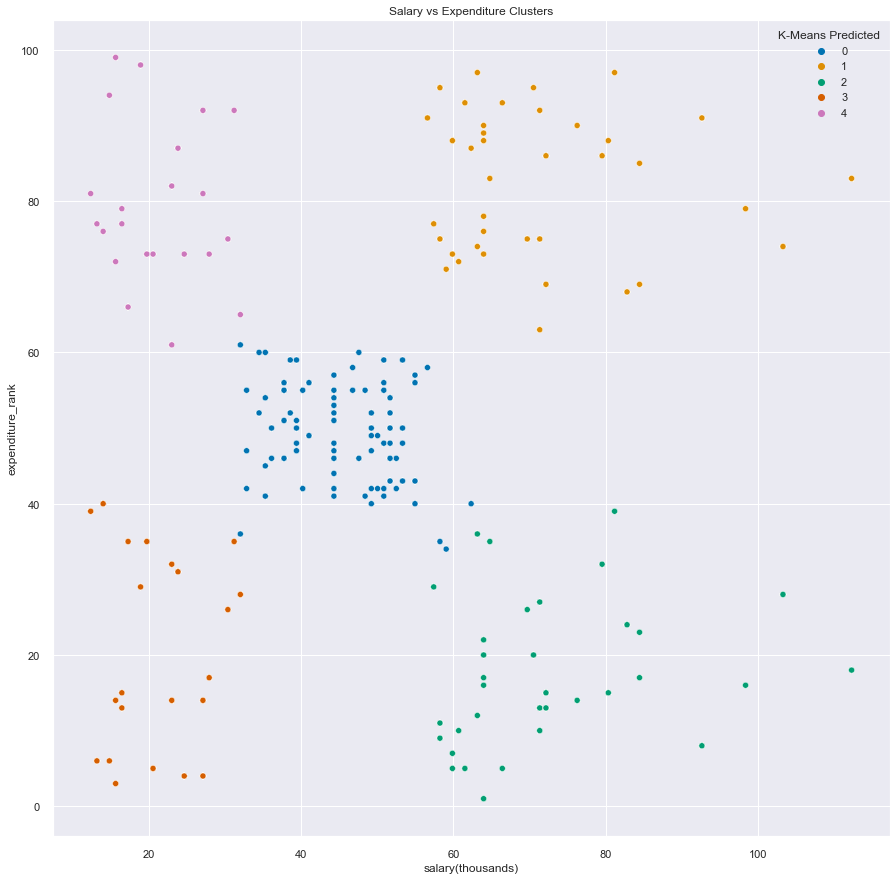

In [104]:
# Visualise the clusters and interpret the model

# Set the figure size 
sns.set(rc = {"figure.figsize":(15,15)})

# Plot a scaterplot using the data from salary_exp_subset
# Set a colorblind-friendly palette for accessibility reasons
sns.scatterplot(x = "salary(thousands)",
                y = "expenditure_rank",
                data= salary_exp_subset,
                hue = "K-Means Predicted",
                palette="colorblind")\
                .set(title="Salary vs Expenditure Clusters")

Setting seaborn titles reference: https://www.statology.org/seaborn-title/

In [105]:
salary_exp_subset["K-Means Predicted"].value_counts()

0    774
1    356
2    330
3    271
4    269
Name: K-Means Predicted, dtype: int64

### Observations

- Largest concentration of values in cluster 0 - it is the most densely packed
- Clusters 1,2,3,4 all have observations that are further from the centroid, hinting at outliers present in each cluster
- Clusters 1,2,3,4 all have roughly the same number of observations per cluster

- Recall that Turtle Games seeks to understand how groups within the customer base can be used to target specific market segments. Clustering the customers helps us categorise the likelihood of them spending with Turtle Games.

- I am assuming highest revenue comes from the most number of observations in a cluster. In this case:
    - cluster 0: highest density between 38-58k salary n expenditure between rank 40-60. Assuming that expenditure and salary isn't 1:1, we can confidently say that the marketing team should allocate the second most marketing budget to this customer segment and price accordingly. 
    - cluster 1: high salary, high expenditure. This type of customer is profitable in the short and long run as they can afford additional expenses. Allocate a higher marketing budget for this customer segment.
    - cluster 2: high salary, low exp. This customer segment is not profitable or cost effective as they don't spend much.
    - cluster 3: low salary, low exp --> This customer segment is not profitable or cost effective as they don't spend much.
    - cluster 4: low salary, high exp --> This customer segment will contribute to revenue but won't be consistent or last in the long run. 
    
### Other areas to explore
- Turtle Games can procure additional data on eg number of purchases per month to check which ones are returning customers. These returning customers can be incentivised with loyalty points or provided customer service if they had a bad experience.

# Assignment activity 3: Analyse customer sentiments with reviews

In [26]:
# import the pandas library
import pandas as pd

# load the cleaned reviews csv
reviews_final = pd.read_csv("turtle_reviews_cleaned")

# View the DataFrame
reviews_final

Unnamed: 0  gender  age  salary(thousands)  expenditure_rank  \
0              0    Male   18              12.30                39   
1              1    Male   23              12.30                81   
2              2  Female   22              13.12                 6   
3              3  Female   25              13.12                77   
4              4  Female   33              13.94                40   
...          ...     ...  ...                ...               ...   
1995        1995  Female   37              84.46                69   
1996        1996  Female   43              92.66                 8   
1997        1997    Male   34              92.66                91   
1998        1998    Male   34              98.40                16   
1999        1999    Male   32              92.66                 8   

      loyalty_points education  product  \
0                210  graduate      453   
1                524  graduate      466   
2                 40  graduate      254   
3                562  graduate      263   
4                366  graduate      291   
...              ...       ...      ...   
1995            4031       PhD      977   
1996             539       PhD      979   
1997            5614  graduate     1012   
1998            1048       PhD     1031   
1999             479       PhD      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [30]:
# Subset the Dataframe to include only the reviews and summary columns.
reviews_final_subset = reviews_final[["review","summary"]]

# View the subsetted DataFrame
reviews_final_subset

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [10]:
# Check for missing values
reviews_final_subset.isnull().sum()

# No missing values detected.

review     0
summary    0
dtype: int64

In [35]:
# impot necessary libaries
import re

# Convert the review column in the subsetted DataFrame to lowercase.
reviews_final_subset["review"] = reviews_final_subset["review"].str.lower()

# Convert the summary column in the subsetted DataFrame to lowercase.
reviews_final_subset["summary"] = reviews_final_subset["summary"].str.lower()

# View the modified DataFrame. 
# NB: warnings appear ahead.
reviews_final_subset

<ipython-input-35-a8dfc285c3f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_final_subset["review"] = reviews_final_subset["review"].str.lower()
<ipython-input-35-a8dfc285c3f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_final_subset["summary"] = reviews_final_subset["summary"].str.lower()


review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*:\n\nyour unpaint...   
2     nice art, nice printing.  why two panels are f...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game.  did not think i would like it whe...   
1997  great game for all.........\nkeeps the mind ni...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

In [42]:
# replace the punctuation in the "review" columns with blanks
reviews_final_subset["review"] = reviews_final_subset["review"].str.replace("[^\w\s]","") 

# replace the punctuation in the "summary" column with blanks
reviews_final_subset["summary"] = reviews_final_subset["summary"].str.replace("[^\w\s]","")

# view the resulting dataset
reviews_final_subset

<ipython-input-42-e863089d88c1>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_final_subset["review"] = reviews_final_subset["review"].str.replace("[^\w\s]","")
<ipython-input-42-e863089d88c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_final_subset["review"] = reviews_final_subset["review"].str.replace("[^\w\s]","")
<ipython-input-42-e863089d88c1>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_final_subset["summary"] = reviews_final_subset["summary"].str.replace("[^\w\s]","")
<ipython-input-42-e863089d88c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

In [46]:
# check the number of duplicates in the review column
print("Number of duplicates in review column:",reviews_final_subset.review.duplicated().sum())

# check the number of duplicates in the summary column
print("Number of duplicates in summmary column:",reviews_final_subset.summary.duplicated().sum())

Number of duplicates in review column: 50
Number of duplicates in summmary column: 649


In [48]:
# drop duplicates in the "review" column
reviews_final_subset= reviews_final_subset.drop_duplicates(subset=["review"])

# drop duplicates in the "summary" column
reviews_final_subset= reviews_final_subset.drop_duplicates(subset=["summary"])

# check id duplicate removal was sucessful
reviews_final_subset.shape

# Perhaps there were overlapping values in both review and summary columns.
# leading to a higher than expected number of rows.

(1349, 2)

## Tokenise both columns and convert to all words into a string 

In [107]:
# Create a new DataFrame to store the copied DataFrame
reviews_final_subset_copy = reviews_final_subset.copy()

# View the copied DataFrame
reviews_final_subset_copy

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1989  this is a fun card game for people who like wo...   
1990  fun for the family just make certain you agree...   
1992  great game to keep the mind active  we play it...   
1994  we are retired and find this a great way to st...   
1995  the perfect word game for mixed ages with mom ...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1989  this is a fun card game for people who like words  
1990  sort of a card game equivalent of scrabble and...  
1992                 great game to keep the mind active  
1994                                  a great mind game  
1995      the perfect word game for mixed ages with mom  

[1349 rows x 2 columns]

In [116]:
# install nltk
!pip install nltk

# import the necessary libraries and packages for tokenisation.
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize

# Apply tokenisation on the reviews column
reviews_final_subset_copy["review"] = reviews_final_subset_copy["review"].apply(word_tokenize)

# Apply tokenisation on the "summary column"
reviews_final_subset_copy["summary"] = reviews_final_subset_copy["summary"].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [117]:
# view the the newly tokenized DataFrame
reviews_final_subset_copy

index                                             review  \
0         0  [when, it, comes, to, a, dms, screen, the, spa...   
1         1  [an, open, letter, to, galeforce9, your, unpai...   
2         2  [nice, art, nice, printing, why, two, panels, ...   
3         3  [amazing, buy, bought, it, as, a, gift, for, o...   
4         4  [as, my, review, of, gf9s, previous, screens, ...   
...     ...                                                ...   
1344   1989  [this, is, a, fun, card, game, for, people, wh...   
1345   1990  [fun, for, the, family, just, make, certain, y...   
1346   1992  [great, game, to, keep, the, mind, active, we,...   
1347   1994  [we, are, retired, and, find, this, a, great, ...   
1348   1995  [the, perfect, word, game, for, mixed, ages, w...   

                                                summary  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1344  [this, is, a, fun, card, game, for, people, wh...  
1345  [sort, of, a, card, game, equivalent, of, scra...  
1346         [great, game, to, keep, the, mind, active]  
1347                             [a, great, mind, game]  
1348  [the, perfect, word, game, for, mixed, ages, w...  

[1349 rows x 3 columns]

In [118]:
# reset the index of the tokenized DataFrame
# the index needs to be reset otherwise the following for loop will not have
# an iterator 
reviews_final_subset_copy = reviews_final_subset_copy.reset_index()

# View the resulting DataFrame.
reviews_final_subset_copy

level_0  index                                             review  \
0           0      0  [when, it, comes, to, a, dms, screen, the, spa...   
1           1      1  [an, open, letter, to, galeforce9, your, unpai...   
2           2      2  [nice, art, nice, printing, why, two, panels, ...   
3           3      3  [amazing, buy, bought, it, as, a, gift, for, o...   
4           4      4  [as, my, review, of, gf9s, previous, screens, ...   
...       ...    ...                                                ...   
1344     1344   1989  [this, is, a, fun, card, game, for, people, wh...   
1345     1345   1990  [fun, for, the, family, just, make, certain, y...   
1346     1346   1992  [great, game, to, keep, the, mind, active, we,...   
1347     1347   1994  [we, are, retired, and, find, this, a, great, ...   
1348     1348   1995  [the, perfect, word, game, for, mixed, ages, w...   

                                                summary  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1344  [this, is, a, fun, card, game, for, people, wh...  
1345  [sort, of, a, card, game, equivalent, of, scra...  
1346         [great, game, to, keep, the, mind, active]  
1347                             [a, great, mind, game]  
1348  [the, perfect, word, game, for, mixed, ages, w...  

[1349 rows x 4 columns]

In [119]:
# Create a list storing all tokens in both columns
# First, create an empty list.
all_tokens_review = []

# Next, we define a for loop to iterate through the review column
# and add its tokens to the empty list.
for i in range(reviews_final_subset_copy.shape[0]):
    all_tokens_review = all_tokens_review + reviews_final_subset_copy["review"][i]
    
# View the resulting list.
all_tokens_review

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [120]:
# Convert the all_tokens_review list to a string
# so that the WordCloud can be generated

# Define an empty string variable to contain the list elements.
all_tokens_review_str = ''

# Use a for loop to add all the elements in the list with a whitespace.
for i in all_tokens_review:
    all_tokens_review_str += ' ' + i 
    
# View the resulting string.
all_tokens_review_str

' when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could

## Create wordclouds (with stopwords)

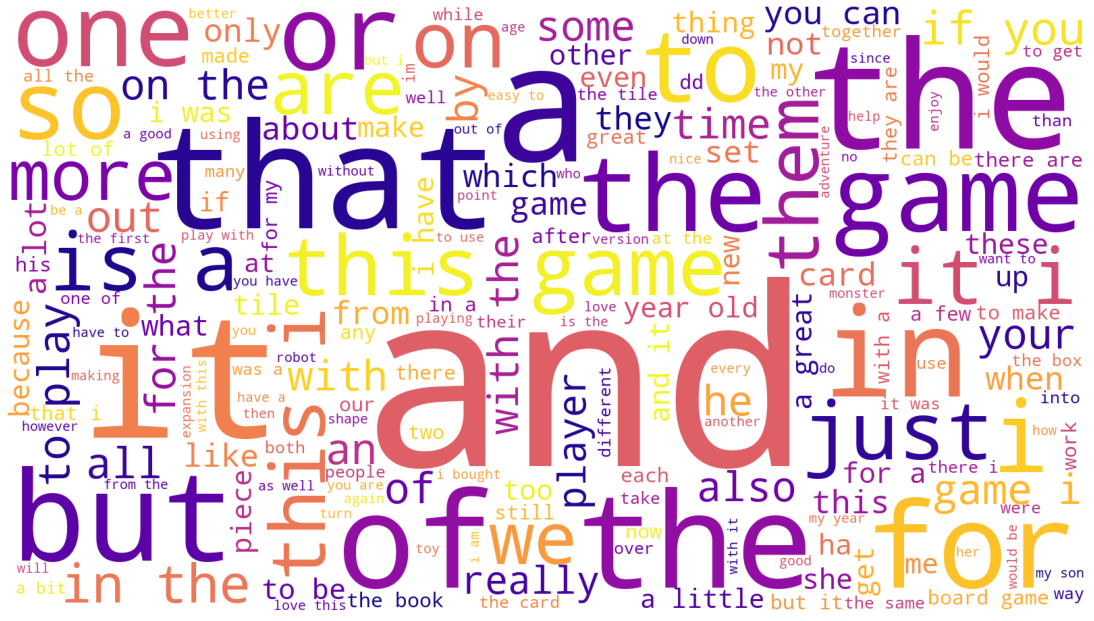

In [121]:
# import the necessary libraries, packages and classes
! pip install Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Create a WordCloud object for the reviews column
# Use the colorblind palette for accessibility
wordcloud_review = WordCloud(width=1600,
                            height=900,
                            background_color="white",
                            colormap="plasma",
                            stopwords = "none",
                            min_font_size=10)\
                            .generate(all_tokens_review_str)

# Plot a wordcloud for the "review" column
plt.figure(figsize = (15,15), facecolor = None)
plt.imshow(wordcloud_review)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [141]:
# Repeat the same process for the "summary" column.

# Create a list storing all tokens in the summary column
# First, create an empty list.
all_tokens_summary = []

# Next, we define a for loop to iterate through the review column
# and add its tokens to the empty list.
for i in range(reviews_final_subset_copy.shape[0]):
    all_tokens_summary = all_tokens_summary + reviews_final_subset_copy["summary"][i]
    
# View the resulting list.
all_tokens_summary

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'best',
 'gm',
 'screen',
 'ever',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'not',
 'enough',
 'product',
 'good',
 'product',
 'but',
 

In [142]:
# Convert the all_tokens_summary list to a string
# so that the WordCloud can be generated

# Define an empty string variable to contain the list elements.
all_tokens_summary_str = ''

# Use a for loop to add all the elements in the list with a whitespace.
for i in all_tokens_summary:
    all_tokens_summary_str += ' ' + i 
    
# View the resulting string.
all_tokens_summary_str

' the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap best gm screen ever great but could be even better another missed opportunity not a value add to the product line love the map not a general dm screen very weak game fell completely flat good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a great buy cant wait to work on this book stained glass perfection four stars so beautiful very nice three stars i like every image contained in this stained glass coloring book creati

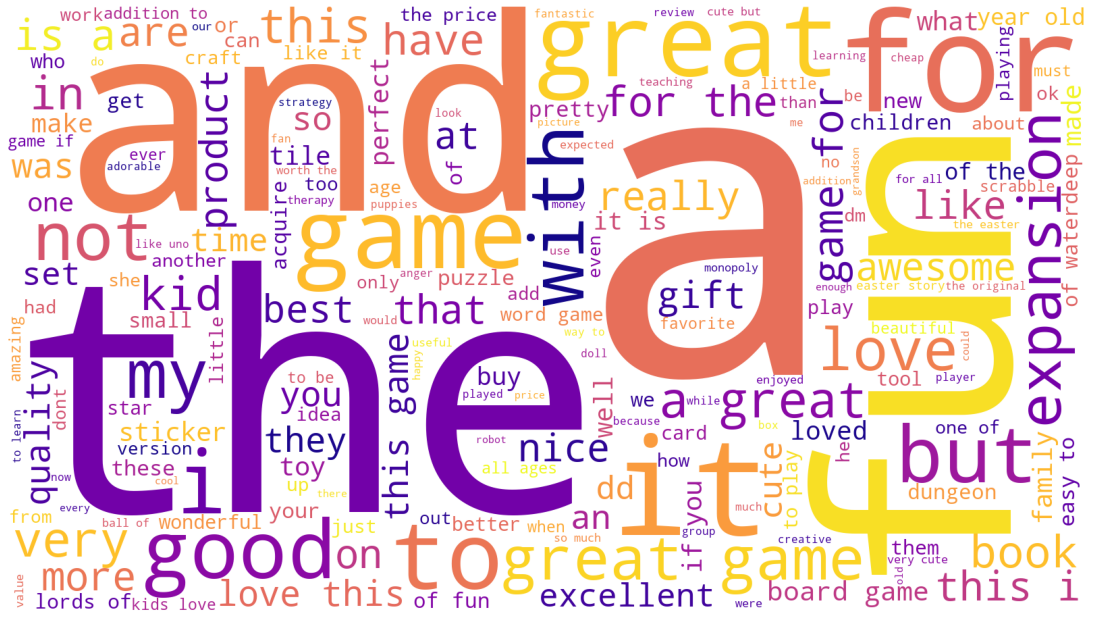

In [143]:
# import the necessary libraries, packages and classes
! pip install Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Create a WordCloud object for the summary column
wordcloud_summary = WordCloud(width=1600,
                            height=900,
                            background_color="white",
                            colormap="plasma",
                            stopwords = "none",
                            min_font_size=10)\
                            .generate(all_tokens_summary_str)

# Plot a wordcloud for the "summary" column
plt.figure(figsize = (15,15), facecolor = None)
plt.imshow(wordcloud_summary)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Determine the frequency distribution and polarity after excluding stopwrods

In [171]:
# import the necessary libraries, packages and classes
from nltk.probability import FreqDist

# Determine the frequency distribution for the review column
FDist_review = FreqDist(all_tokens_review)

# View the Frequency Distribution for the review column.
FDist_review

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

<AxesSubplot:xlabel='Word', ylabel='Count'>

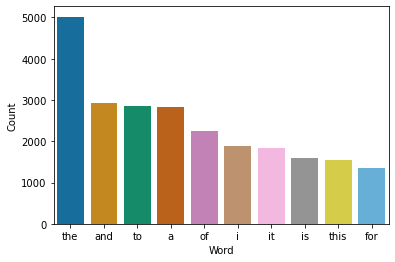

In [175]:
# Convert the Frequency Dsitribution to a DataFrame.
FDist_review_df = pd.DataFrame(FDist_review, index =[1])

# Transpose the DataFrame and sort by the highest count
FDist_review_df = FDist_review_df.T.sort_values(by = 1,ascending = False)

# Reset the DataFrame's index and rename columns.
FDist_review_df = FDist_review_df.reset_index()
FDist_review_df.columns = ["Word","Count"]

# View the resulting DataFrame
FDist_review_df.head()

# Plot the frequency distribution via a barplot for the top 10 words.
sns.barplot(x="Word",y="Count",data=FDist_review_df.head(10),palette="colorblind")

In [177]:
# Determine the frequency distribution for the summary column
FDist_summary = FreqDist(all_tokens_summary)

# View the Frequency Distribution for the review column.
FDist_summary

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

<AxesSubplot:xlabel='Word', ylabel='Count'>

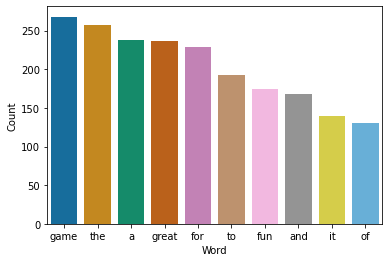

In [178]:
# Convert the Frequency Dsitribution to a DataFrame.
FDist_summary_df = pd.DataFrame(FDist_summary, index =[1])

# Transpose the DataFrame and sort by the highest count
FDist_summary_df = FDist_summary_df.T.sort_values(by = 1,ascending = False)

# Reset the DataFrame's index and rename columns.
FDist_summary_df = FDist_summary_df.reset_index()
FDist_summary_df.columns = ["Word","Count"]

# View the resulting DataFrame
FDist_summary_df.head()

# Plot the frequency distribution via a barplot for the top 10 words.
sns.barplot(x="Word",y="Count",data=FDist_summary_df.head(10),palette="colorblind")

## Filter out non-alphanumeric characters and stopwords from both strings

In [181]:
# Filter out alphanumeric characters for the review column's tokens.
all_tokens_review2 = [word for word in all_tokens_review if word.isalnum()]

# Filter out alphanumeric characters for the summary column's tokens.
all_tokens_summary2 = [word for word in all_tokens_summary if word.isalnum()]

In [208]:
# Remove the stopwords from the the filtered review column's tokens (all_tokens_review_2)

# import the "stopwords" package from nltk.
nltk.download("stopwords")
from nltk.corpus import stopwords

# create a set of english stopwords
all_eng_stopwords = set(stopwords.words("english"))

# Use list comprehenstion to filter out words in all_tokens_review2 that are not stopwords.
all_tokens_review_clean = [x for x in all_tokens_review2 if x.lower() not in all_eng_stopwords]

# Use list comprehenstion to filter out words in all_tokens_summary2 that are not stopwords.
all_tokens_summary_clean = [x for x in all_tokens_summary2 if x.lower() not in all_eng_stopwords]

# Use a for loop to append results into a string needed for creating a wordcloud.

# Create an empty string to append the cleaned review tokens.
all_tokens_review_clean_str= ''

# Use a for loop to append the cleaned review tokens to the empty string.
for i in all_tokens_review_clean:
    all_tokens_review_clean_str += " " + i

# View the resulting string.
all_tokens_review_clean_str

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


' comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce9 unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgo

In [302]:
# Repeat the same process for the summary column.

# Create an empty string to append the cleaned summary tokens.
all_tokens_summary_clean_str= ''

# Use a for loop to append the cleaned summary tokens to the empty string.
for i in all_tokens_summary_clean:
    all_tokens_summary_clean_str += " " + i

# View the resulting string.
all_tokens_summary_clean_str

' fact 50 space wasted art terribly informative needed art another worthless dungeon masters screen galeforce9 pretty also pretty useless five stars money trap best gm screen ever great could even better another missed opportunity value add product line love map general dm screen weak game fell completely flat good book buckley card mommer advanced good gets better know youre getting dont bother worst value ive ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great ive done one gave great buy cant wait work book stained glass perfection four stars beautiful nice three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures great transaction drawings nice put windows great 30 minute toy great ok best fun robot themed gift 6 yr old great party thank bag addition tiny 

## Create wordclouds for both columns (excluding stopwords)

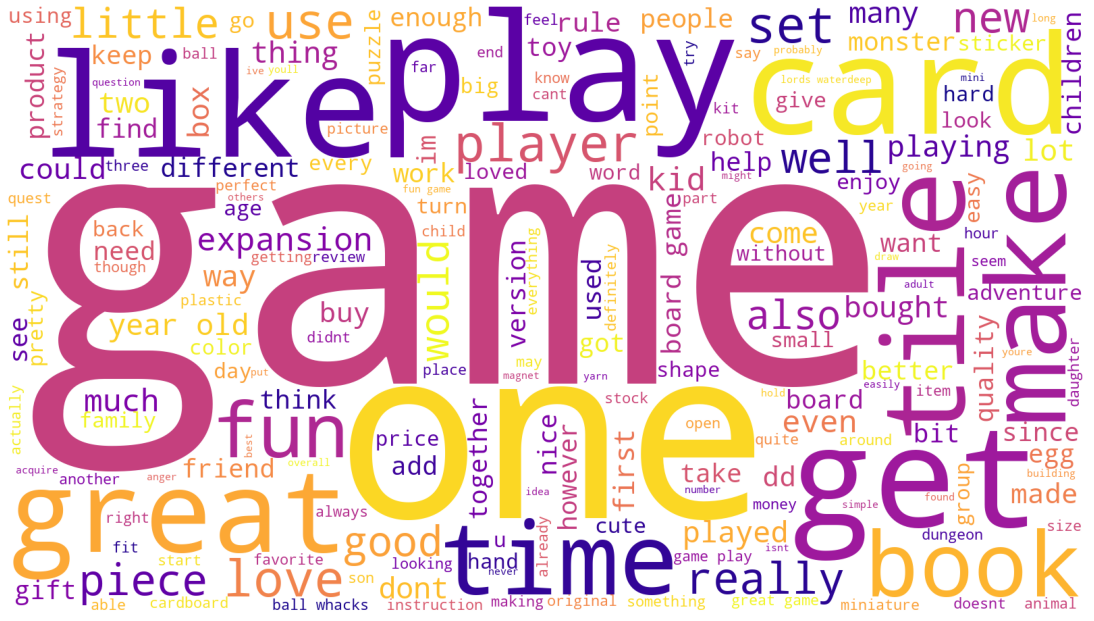

In [210]:
# Create a wordcloud for the review and summary columns witout stopwords
# Create a WordCloud object for the review column (cleaned)
wordcloud_review_clean = WordCloud(width=1600,
                            height=900,
                            background_color="white",
                            colormap="plasma",
                            stopwords = "none",
                            min_font_size=10)\
                            .generate(all_tokens_review_clean_str)

# Plot a wordcloud for the "summary" column
plt.figure(figsize = (15,15), facecolor = None)
plt.imshow(wordcloud_review_clean)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

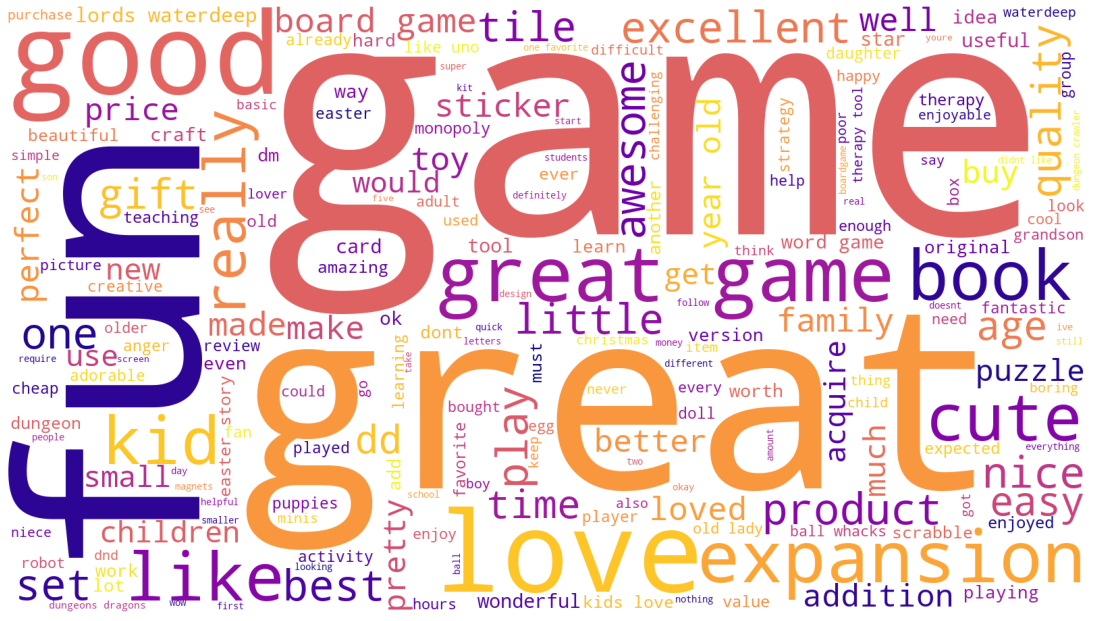

In [211]:
# Create a WordCloud object for the review column (cleaned)
wordcloud_summary_clean = WordCloud(width=1600,
                            height=900,
                            background_color="white",
                            colormap="plasma",
                            stopwords = "none",
                            min_font_size=10)\
                            .generate(all_tokens_summary_clean_str)

# Plot a wordcloud for the "summary" column
plt.figure(figsize = (15,15), facecolor = None)
plt.imshow(wordcloud_summary_clean)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Identifying the most frequent of words in both columns and their polarity scores.

In [205]:
# Identify the 15 most common words used

# Create a new FreqDist variable for the review column
fdist_all_rev_tokens_clean = FreqDist(all_tokens_review_clean)

# View the FreqDist object
fdist_all_rev_tokens_clean

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 391, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [206]:
# Create a new FreqDist variable for the summary column
fdist_all_summ_tokens_clean = FreqDist(all_tokens_summary_clean)

# View the FreqDist
fdist_all_summ_tokens_clean

FreqDist({'game': 268, 'great': 236, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [288]:
# Identify the 15 most common words used

# Import the Counter Class
from collections import Counter

# Convert the FDist object for the cleaned review tokens into a DataFrame.
FDist_rev_clean_df = pd.DataFrame(Counter(fdist_all_rev_tokens_clean).most_common(15),
                                  columns=["Word","Frequency"])\
                                  .reset_index()

# Convert the FDist object for the cleaned summary tokens into a DataFrame.
FDist_summ_clean_df = pd.DataFrame(Counter(fdist_all_summ_tokens_clean).most_common(15),
                                  columns=["Word","Frequency"])\
                                  .reset_index()

In [287]:
# View the resulting FDist Review DataFrame
FDist_rev_clean_df

index    Word  Frequency
0       0    game       1359
1       1     one        475
2       2    play        442
3       3     fun        407
4       4   great        391
5       5    like        373
6       6     get        293
7       7   cards        281
8       8   tiles        280
9       9  really        278
10     10    book        259
11     11   would        252
12     12    well        246
13     13    time        244
14     14     new        237

In [289]:
# View the resulting FDist Summary DataFrame
FDist_summ_clean_df

index       Word  Frequency
0       0       game        268
1       1      great        236
2       2        fun        175
3       3       good         84
4       4       love         70
5       5       like         54
6       6       kids         48
7       7       book         42
8       8  expansion         42
9       9       cute         40
10     10        old         34
11     11     really         30
12     12        set         29
13     13       nice         28
14     14        one         28

In [294]:
# Calculate the sentiment polarity of both columns.

# Generate polarity scores user-defined function.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Apply the user define function to the "Word" column in the review FreqDist DataFrame.
FDist_rev_clean_df["polarity_score"] = FDist_rev_clean_df["Word"].apply(generate_polarity)

# Sort the polarity scores in descending order.
FDist_rev_clean_df.sort_values(by="polarity_score",ascending = False)

index    Word  Frequency  polarity_score
4       4   great        391        0.800000
3       3     fun        407        0.300000
9       9  really        278        0.200000
14     14     new        237        0.136364
1       1     one        475        0.000000
2       2    play        442        0.000000
5       5    like        373        0.000000
6       6     get        293        0.000000
7       7   cards        281        0.000000
8       8   tiles        280        0.000000
10     10    book        259        0.000000
11     11   would        252        0.000000
12     12    well        246        0.000000
13     13    time        244        0.000000
0       0    game       1359       -0.400000

In [295]:
# Apply the user define function to the "Word" column in the summary FreqDist DataFrame.
FDist_summ_clean_df["polarity_score"] = FDist_summ_clean_df["Word"].apply(generate_polarity)

# Sort the polarity scores in descending order.
FDist_summ_clean_df.sort_values(by="polarity_score",ascending = False)

index       Word  Frequency  polarity_score
1       1      great        236             0.8
3       3       good         84             0.7
13     13       nice         28             0.6
4       4       love         70             0.5
9       9       cute         40             0.5
2       2        fun        175             0.3
11     11     really         30             0.2
10     10        old         34             0.1
5       5       like         54             0.0
6       6       kids         48             0.0
7       7       book         42             0.0
8       8  expansion         42             0.0
12     12        set         29             0.0
14     14        one         28             0.0
0       0       game        268            -0.4

In [218]:
# install the TextbLob library 
! pip install TextBlob

# import the TextBlob class
from textblob import TextBlob

## Create histograms of sentiment from the review and summary columns

In [238]:
# Create a user defined function to generate polarity and subjectivity scores.

# Generate polarity scores user-defined function.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Generate subjectivity scores user-defined function.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Run the user defined functions and create new columns in the
# original subsetted DataFrame.
reviews_final_subset["rev_polarity"] = reviews_final_subset["review"].apply(generate_polarity)
reviews_final_subset["summ_polarity"] = reviews_final_subset["summary"].apply(generate_polarity)
reviews_final_subset["rev_subjectivity"] = reviews_final_subset["review"].apply(generate_subjectivity)
reviews_final_subset["summ_subjectivity"] = reviews_final_subset["summary"].apply(generate_subjectivity)

# View the original subsetted DataFrame.
reviews_final_subset

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1989  this is a fun card game for people who like wo...   
1990  fun for the family just make certain you agree...   
1992  great game to keep the mind active  we play it...   
1994  we are retired and find this a great way to st...   
1995  the perfect word game for mixed ages with mom ...   

                                                summary  rev_polarity  \
0     the fact that 50 of this space is wasted on ar...     -0.036111   
1     another worthless dungeon masters screen from ...      0.035952   
2                        pretty but also pretty useless      0.116640   
3                                            five stars      0.578788   
4                                            money trap     -0.316667   
...                                                 ...           ...   
1989  this is a fun card game for people who like words      0.250000   
1990  sort of a card game equivalent of scrabble and...      0.171429   
1992                 great game to keep the mind active      0.155208   
1994                                  a great mind game      0.400000   
1995      the perfect word game for mixed ages with mom      0.168750   

      summ_polarity  rev_subjectivity  summ_subjectivity  
0          0.150000          0.486111           0.500000  
1         -0.800000          0.442976           0.900000  
2          0.000000          0.430435           0.733333  
3          0.000000          0.784848           0.000000  
4          0.000000          0.316667           0.000000  
...             ...               ...                ...  
1989      -0.050000          0.533333           0.300000  
1990      -0.400000          0.290476           0.400000  
1992       0.088889          0.478125           0.583333  
1994       0.200000          0.633333           0.575000  
1995       0.200000          0.491667           0.550000  

[1349 rows x 6 columns]

Text(0.5, 1.0, 'Histogram of Polarity Sentiment (Reviews)')

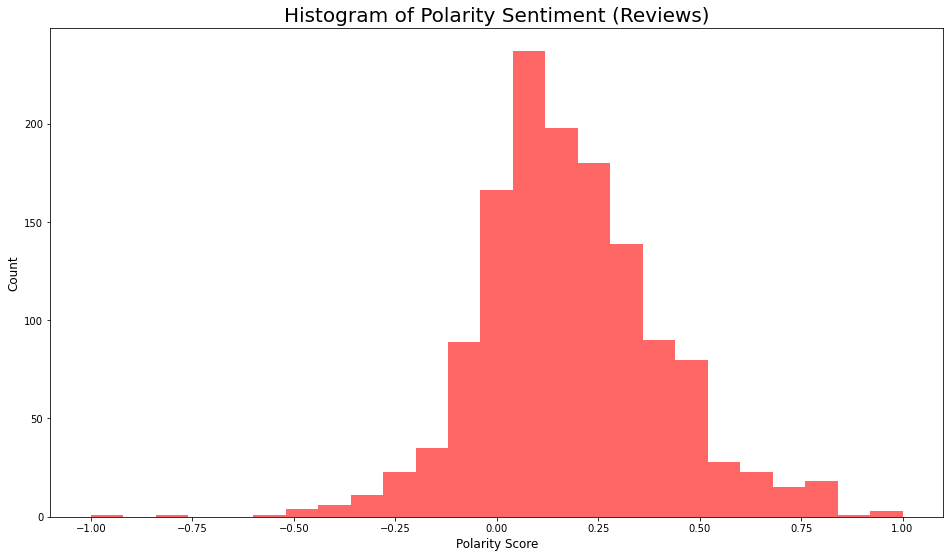

In [299]:
# Plot a histogram of showing the distribution of positive and negative comments for the review column.

# Define the number of bins as 15
num_bins = 15

# Set the figure size
plt.figure(figsize=(16,9))

# Plot the histogram using data from reviews_final_subset.
n, bins, patches = plt.hist(reviews_final_subset["rev_polarity"], num_bins, facecolor = "red", alpha = 0.6)

# Set the x-axis, y-axis labels and title.
plt.xlabel("Polarity Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of Polarity Sentiment (Reviews)", fontsize=20)

Observations: Most comments tend to fall within the positive range (polarity score between 0 and 0.5). This suggests that the customers are generally satisfied with the products, and that it would be worth digging into the negative reviews to see how we can maximise business.

Text(0.5, 1.0, 'Histogram of Polarity Sentiment (Summary)')

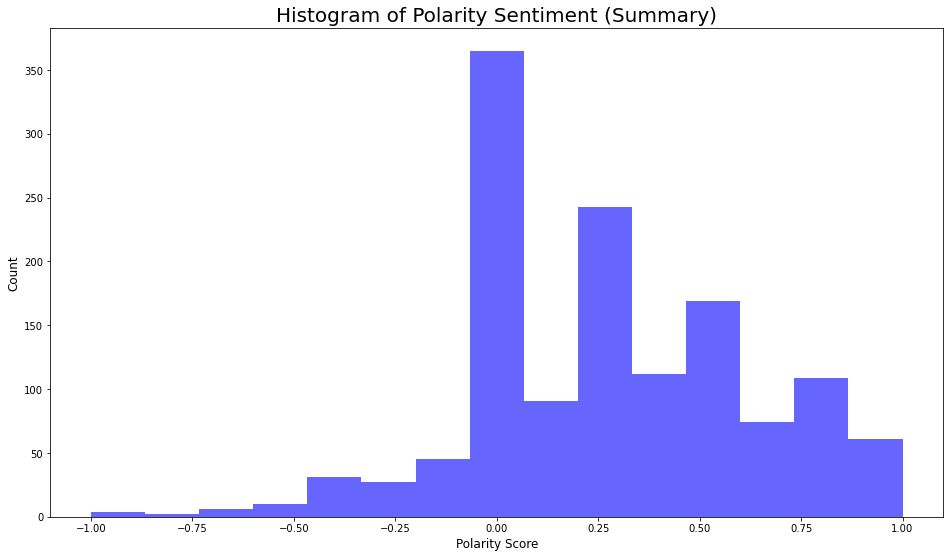

In [300]:
# Plot a histogram of showing the distribution of positive and negative comments for the summary column.

# Define the number of bins as 15
num_bins = 15

# Set the figure size
plt.figure(figsize=(16,9))

# Plot the histogram using data from reviews_final_subset.
n, bins, patches = plt.hist(reviews_final_subset["summ_polarity"], num_bins, facecolor = "blue", alpha = 0.6)

# Set the x-axis, y-axis labels and title.
plt.xlabel("Polarity Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of Polarity Sentiment (Summary)", fontsize=20)

Observations: Negative polarity scores tend to form the minority. Majority of the reviews fall under the "Neutral" band with polarity scores of 0; positive polarity scores then to fluctuate (peaks can be seen at 0.25, 0.5 and 0.75-0.90).

Used in conjunction with the previous histogram, we can conclude that:
- both summaries and reviews are corroborate negative polarity scores, as they both show similar distributions
- the histograms do not corroborate positive polarity scores, indicating that there might be inaccuracies in the way we are interpreting positive reviews (eg positive review, but negative sentiment score in summaries). We need to use the positive sentiment scores with caution.

## Determine the top 20 and lowest 20 reviews

In [264]:
# Identify the top 20 positive comments in the review column by sorting the polarity scores
# in descending order, and using head to show the top 20 values.
top_20_positive_reviews_df = reviews_final_subset.sort_values(by = "rev_polarity",ascending= False).head(20)

# Subset the DataFrame so it retains relevant columns.
top_20_positive_reviews_df = top_20_positive_reviews_df[["review","rev_polarity"]]

# Set the width as 1200px so all the reviews can be read.
top_20_positive_reviews_df.style.set_properties(subset=["review"],**{"width":"1200px"})

In [265]:
# Identify the top 20 positive comments in the summary column by sorting the polarity scores
# in descending order, and using head to show the top 20 values.
top_20_positive_summ_df = reviews_final_subset.sort_values(by = "summ_polarity",ascending= False).head(20)

# Subset the DataFrame so it retains relevant columns.
top_20_positive_summ_df = top_20_positive_summ_df[["summary","summ_polarity"]]

# Set the width as 1200px so all the reviews can be read.
top_20_positive_summ_df.style.set_properties(subset=["summary"],**{"width":"1200px"})

In [262]:
# Identify the top 20 negative comments in the review column by sorting the polarity scores
# in ascending order, and using head to show the top 20 values.
top_20_negative_rev_df = reviews_final_subset.sort_values(by = "rev_polarity",ascending= True).head(20)

# Subset the DataFrame so it retains relevant columns.
top_20_negative_rev_df = top_20_negative_rev_df[["review","rev_polarity"]]

# Set the width as 1200px so all the reviews can be read.
top_20_negative_rev_df.style.set_properties(subset=["review"],**{"width":"1200px"})

In [263]:
# Identify the top 20 negative comments in the summary column by sorting the polarity scores
# in ascending order, and using head to show the top 20 values.
top_20_negative_summ_df = reviews_final_subset.sort_values(by = "summ_polarity",ascending= True).head(20)

# Subset the DataFrame so it retains relevant columns.
top_20_negative_summ_df = top_20_negative_summ_df[["summary","summ_polarity"]]

# Set the width as 1200px so all the reviews can be read.
top_20_negative_summ_df.style.set_properties(subset=["summary"],**{"width":"1200px"})

## OBSERVATIONS


> **Data Hygiene**
- Presence of duplicate reviews and summaries could indicate errors in the IT or feedback collection system.
- Perhaps there were overlapping values in both review and summary columns leading to a higher than expected number of rows.

> **On Analysis of Wordclouds**
- Initial wordclouds are uninformative as stopwords have not been excluded. Post-exclusion we can infer that:
    - from the reviews column: the words game, like, book, tile, play, make, great, time are the largest. This suggests that games and books are popular among the customers, especially board, tile, card games, followed by books.
    - from the summary column: results corroborate the reviews wordcloud, with words like great, game, love, expansion, board game and book being medium to large in size. 
- It would appear that customers love our games, perhaps board games, and then books. There are duplicates - the word "great" is repeated twice indicating whitespace or data not cleaned not properly.

> **On the top 15 common review and summary words.**
- The top 15 most common review words have mostly neutral polarity scores, perhaps suggesting poeple feel indifferent on reviews.
- The top 15 most common summary words have mostly positive polarity scores, sugesting that people feel positive in summaries. This conflict with positive scores may imply that people may downplay their positive comments in reviews (or vice versa - that summaries are an exaggeration of the reviews). More investigation is requred.

> **On the top 20 reviews and Summaries**
- positive reviews & summary: tends to show very positive sentiment
- negative review: 
    - not all comments with negative sentiment are actually negative
    - most negative sentiments are directed towards incomplete product packaging
    - or towards unclear instructions, product mishaps (eg products not working properly), incomplete kits, unclear messaging (eg games need patience)
    - copied games or quality issues (eg cardboard issues)
    - negative sentiments are highly inaccurate. at least half were positive.
- negative summaries:
    - negative summaries are highly accurate, showing people really are disappointed.

- Inference: the fact that negative reviews are inaccurate may hint at the NLP library being inaccurately trained.
- People tend to favour summaries for negative comments over reviews.
    
> **Next steps the business can take:**
- contact the customers who are disappointed with their purchases and remedy their concerns.
- check the feedback system - why are there duplicates?
- Marketing insights: People are generally satisfied with games and books. Perhaps used in conjunction with sales data we can prioritise marketing board games and books to certain customer segments. 
- Marketing insights 2: Check the supplier: why do certain games have product issues, and how are they marketed in a way where the instructions or packaging is unclear? Could we triangulate to find the source of these issues (eg vendors, suppliers, lack of internal training)?

> **Other areas to explore**
- Creating a classification model to test the accuracy of NLP - eg possibilities of comments that are actually negative but have a positive summary score, and vice versa.
- Interpreting the resulting confusion matrix and providing suggestions on how to improve the resulting model. In this case we'd focus prioritising low false positives, as we are losing business from mislabelled data.

> References for other data wrangling activities
- https://datatofish.com/lowercase-pandas-dataframe/
- https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/
- https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/


> **Other areas of exploration - unfinished code**

As there is a possibility of inaccurate data, I will attempt to make a classification model to predict the data properly. In this case I wanted to manually labelling the data (eg first 200 rows) to train a RandomForestClassifier object to create a model, which I will then test on the the whole dataset (all 2000 rows). 

The RandomForestClassifier Method can be referenced here: https://www.analyticsvidhya.com/blog/2021/06/nlp-sentiment-analysis/

I would then test this model using a confusion matrix, and reiterate until the confusion matrix shows favourable results, then apply the model to the data and show the distribution of positive and negative sentiment. We can also use a left join to join add other fields into these reviews, such as platform, product id etc, which can inform other budget allocations for other business divisions.

In [ ]:
all_tokens_review_clean
all_tokens_summary_clean

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

In [ ]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

In [ ]:
for i in range(432):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rfc.fit(X,y)

In [ ]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])

In [ ]:
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

In [ ]:
predictions_probability = rfc.predict_proba(testdata)
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [ ]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)

In [27]:
import pandas as pd
nltk.download("punkt")
from nltk.tokenize import word_tokenize


# load the cleaned reviews csv
reviews_final = pd.read_csv("turtle_reviews_cleaned")

# Subset the Dataframe to include only the reviews and summary columns.
reviews_final_subset = reviews_final[["review","summary"]]

reviews_final_subset["tokens"] = reviews_final_subset["review"].apply(word_tokenize)

reviews_final_subset_copy = reviews_final_subset.copy()

# Apply tokenisation on the reviews column
reviews_final_subset_copy["review"] = reviews_final_subset_copy["review"].apply(word_tokenize)

# Apply tokenisation on the "summary column"
reviews_final_subset_copy["summary"] = reviews_final_subset_copy["summary"].apply(word_tokenize)

all_tokens = []

for i in range (reviews_final_subset_copy.shape[0]):
    all_tokens = all_tokens + reviews_final_subset_copy["summary"][i]
    
all_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-27-f0fb842f3d42>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_final_subset["tokens"] = reviews_final_subset["review"].apply(word_tokenize)


['The',
 'fact',
 'that',
 '50',
 '%',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 '(',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 '...',
 'Another',
 'worthless',
 'Dungeon',
 'Master',
 "'s",
 'screen',
 'from',
 'GaleForce9',
 'pretty',
 ',',
 'but',
 'also',
 'pretty',
 'useless',
 'Five',
 'Stars',
 'Money',
 'trap',
 'Five',
 'Stars',
 'Best',
 'gm',
 'screen',
 'ever',
 'Five',
 'Stars',
 'Great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'Another',
 'missed',
 'opportunity',
 '.',
 'Not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 '.',
 'Five',
 'Stars',
 'Love',
 'the',
 'map',
 '!',
 'Not',
 'a',
 'general',
 'DM',
 'screen',
 'Very',
 'weak',
 'game',
 'Fell',
 'completely',
 'flat',
 '...',
 'Five',
 'Stars',
 'Good',
 'book',
 'Buckley',
 'was',
 'a',
 'card',
 'mommer',
 'Very',
 'advanced',
 ',',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'You',
 'better',
 'know',
 'what',
 'you',
 "'re",
 'getting'